In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error

In [3]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    mask_fixedacid = df["fixed acidity"] < 15
    mask_volatileacid = df["volatile acidity"] < 14
    mask_citricacid = df["citric acid"] < 0.9 
    mask_residualsugar = df["residual sugar"] < 14
    mask_chlorides = df["chlorides"] < 0.5 
    mask_freesulfurdioxide = df["free sulfur dioxide"] < 60
    mask_totalsulfurdioxide = df["total sulfur dioxide"] < 250
    mask_ph = (df["pH"] > 2.8) & (df["pH"] < 3.9)
    mask_sulphates = df["sulphates"] < 1.75
    mask_alchol = df["alcohol"] < 14.5
    mask_quality = (df["quality"] > 3.5) & (df["quality"] < 7.5)
    
    df = df[mask_fixedacid & mask_volatileacid & mask_citricacid & mask_residualsugar &
           mask_chlorides & mask_freesulfurdioxide & mask_totalsulfurdioxide & mask_ph &
           mask_sulphates & mask_alchol & mask_quality]

    return df


In [4]:
df = wrangle("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df["pH"].value_counts()

3.30    57
3.36    56
3.26    53
3.39    48
3.38    47
        ..
2.87     1
2.92     1
3.70     1
2.90     1
2.88     1
Name: pH, Length: 84, dtype: int64

In [6]:
df["pH"].nunique()

84

In [7]:
df.isnull().sum() / len(df)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [8]:
df.shape

(1546, 12)

In [9]:
df.nunique()

fixed acidity            90
volatile acidity        141
citric acid              78
residual sugar           85
chlorides               145
free sulfur dioxide      55
total sulfur dioxide    140
density                 421
pH                       84
sulphates                92
alcohol                  62
quality                   4
dtype: int64

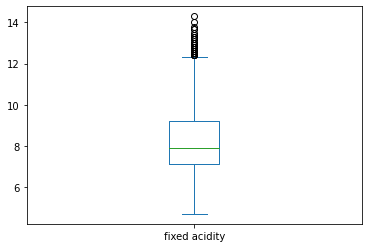

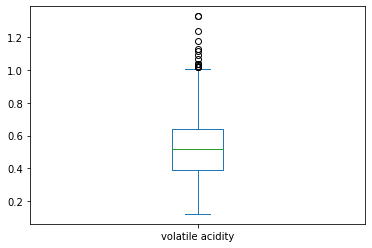

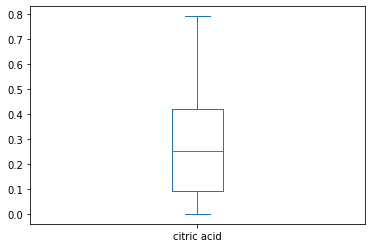

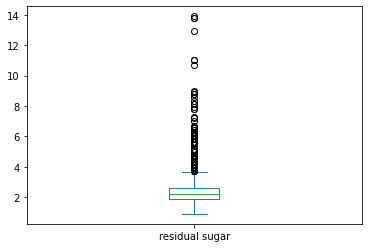

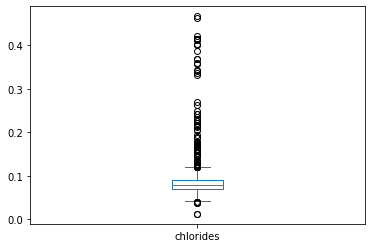

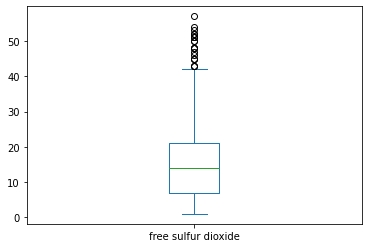

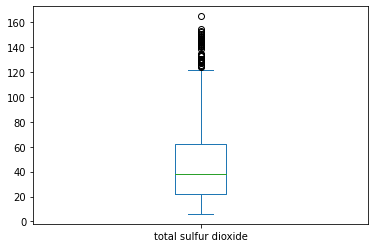

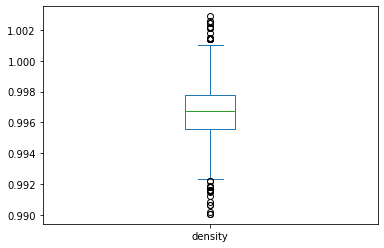

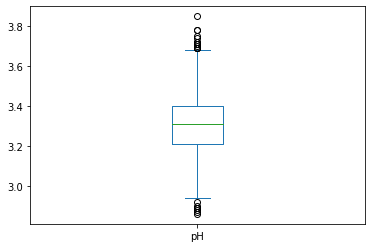

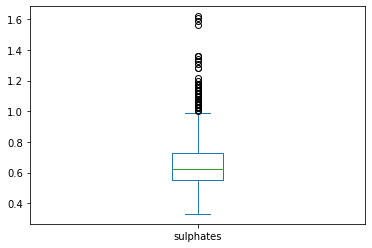

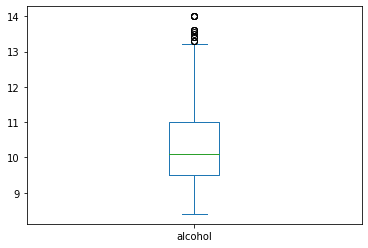

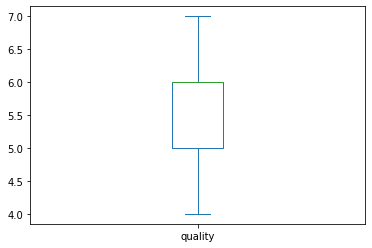

In [10]:
for col in df.columns:
    df[col].plot(kind="box")
    plt.show()


In [11]:
corr = df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.261659,0.676938,0.100240,0.098199,-0.150955,-0.106353,0.661133,-0.681026,0.188168,-0.060329,0.133934
volatile acidity,-0.261659,1.000000,-0.555379,0.015710,0.061663,-0.004752,0.101675,0.023184,0.222171,-0.271141,-0.215234,-0.372031
citric acid,0.676938,-0.555379,1.000000,0.140227,0.183659,-0.063129,0.025003,0.363797,-0.524979,0.313790,0.115171,0.221804
residual sugar,0.100240,0.015710,0.140227,1.000000,0.029326,0.106616,0.158120,0.338183,-0.055852,0.014422,0.056710,0.014995
chlorides,0.098199,0.061663,0.183659,0.029326,1.000000,-0.028054,0.046932,0.191552,-0.252607,0.352717,-0.213848,-0.096121
free sulfur dioxide,-0.150955,-0.004752,-0.063129,0.106616,-0.028054,1.000000,0.668602,-0.037539,0.083725,0.056662,-0.069573,-0.060033
total sulfur dioxide,-0.106353,0.101675,0.025003,0.158120,0.046932,0.668602,1.000000,0.096079,-0.049210,0.014992,-0.238134,-0.231892
density,0.661133,0.023184,0.363797,0.338183,0.191552,-0.037539,0.096079,1.000000,-0.315141,0.152763,-0.495054,-0.159049
pH,-0.681026,0.222171,-0.524979,-0.055852,-0.252607,0.083725,-0.049210,-0.315141,1.000000,-0.147617,0.200004,-0.041505
sulphates,0.188168,-0.271141,0.313790,0.014422,0.352717,0.056662,0.014992,0.152763,-0.147617,1.000000,0.115377,0.280014
